<a href="https://colab.research.google.com/github/Davianka/stroke-prediction/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. According to the WHO, Stroke is the second leading cause of death globally. This dataset is used to predict whether a patient is likely to get a stroke based on parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient. 



# Exploring the Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib.colors import ListedColormap
from imblearn.over_sampling import SMOTE
smote= SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
df=pd.read_csv('/content/drive/MyDrive/project 1/project 2/healthcare-dataset-stroke-data 3.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

dropping id because every patient has its own id and there seems to be no correlation with id 

In [10]:
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

checking for any type of typos in the data

In [11]:
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64



- Column= ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64



- Column= work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64



- Column= Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64



- Column= smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64





In [12]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [14]:
df['avg_glucose_level'].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

In [15]:
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [16]:
df['age'].nunique()

104

In [17]:
df.loc[df['age'] ==0.08]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [18]:
df= df.drop(columns = 'id')

## Exploring more Data using Groupby

In [19]:
df.groupby(['stroke', 'gender'])['age'].mean()

stroke  gender
0       Female    42.601935
        Male      41.083388
        Other     26.000000
1       Female    67.137021
        Male      68.500000
Name: age, dtype: float64

In [20]:
df.groupby(['stroke', 'smoking_status'])['bmi'].mean()

stroke  smoking_status 
0       Unknown            25.592847
        formerly smoked    30.727692
        never smoked       29.960860
        smokes             30.541547
1       Unknown            29.351724
        formerly smoked    31.014035
        never smoked       30.439286
        smokes             30.579487
Name: bmi, dtype: float64

In [21]:
df.groupby('stroke')['age'].min()

stroke
0    0.08
1    1.32
Name: age, dtype: float64

In [22]:
df.groupby(['stroke', 'hypertension'])['age'].mean()

stroke  hypertension
0       0               40.112820
        1               61.027778
1       0               66.832350
        1               70.212121
Name: age, dtype: float64

In [23]:
df.groupby(['heart_disease', 'hypertension'])['bmi'].mean()

heart_disease  hypertension
0              0               28.408753
               1               33.280916
1              0               29.982703
               1               31.381034
Name: bmi, dtype: float64

on average, older people are more likely to experience hypertension than younger people. 

In [24]:
df.groupby(['heart_disease', 'hypertension']) ['avg_glucose_level'].mean()

heart_disease  hypertension
0              0               102.158132
               1               127.089562
1              0               132.475142
               1               151.207031
Name: avg_glucose_level, dtype: float64

In [25]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


The data is unbalanced

In [26]:
df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [27]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

# Data Visuals

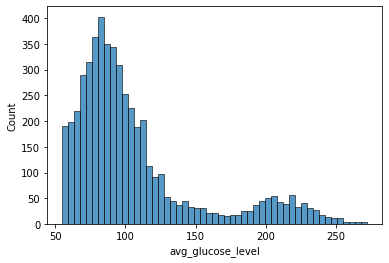

In [28]:
sns.histplot(data=df, x='avg_glucose_level');

According to the CDC blood glucose level Before a meal: 80 to 130 mg/dL. Two hours after the start of a meal: Less than 180 mg/dL.  Im curious to know if the glucose tests were done on empty stomachs or not,  according to the above 'group by' people with the highest bmi average had hypertension and heart disease and people with the lowest average glucose had neither heart disease nor hypertension

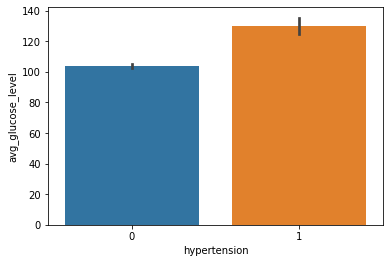

In [29]:
sns.barplot(data=df, y='avg_glucose_level', x='hypertension');

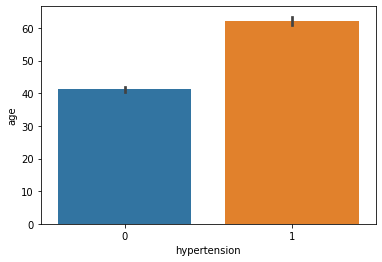

In [30]:
sns.barplot(data=df, y='age', x='hypertension');

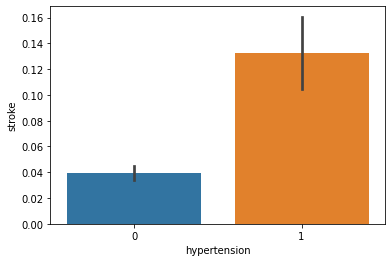

In [31]:
sns.barplot(data=df, y='stroke', x='hypertension');

people with hypertension are much more likely to have a stroke than those who do not.

In [32]:
df.groupby('stroke')['age'].mean()

stroke
0    41.971545
1    67.728193
Name: age, dtype: float64

there are not really ouliers in the age data. the majority of the data is between 24-61


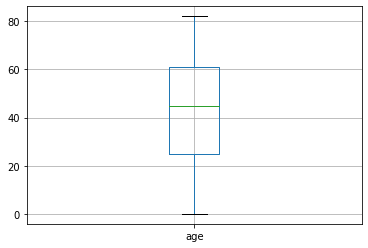

In [33]:
df.boxplot(column='age');
print('there are not really ouliers in the age data. the majority of the data is between 24-61')

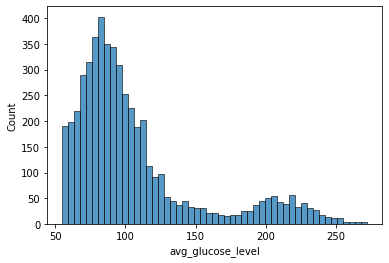

In [34]:
sns.histplot(data=df, x='avg_glucose_level');

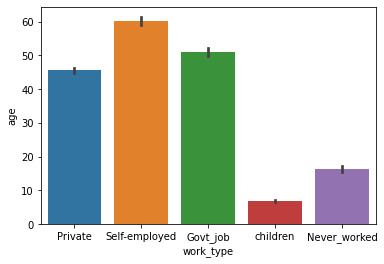

In [35]:
sns.barplot(data=df, y='age', x='work_type');

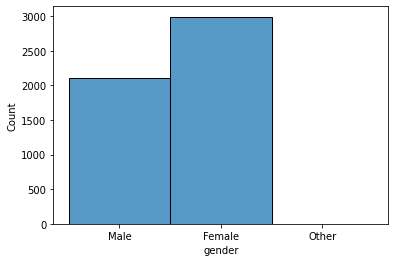

In [36]:
sns.histplot(data=df, x='gender');

In [37]:
df.groupby('stroke')['age'].max()

stroke
0    82.0
1    82.0
Name: age, dtype: float64

Checking BMI to see if there is a big difference between people who had strokes and those who did not to see how i will handle missing data!

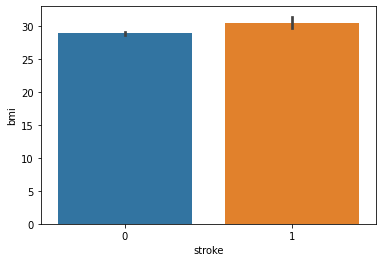

In [38]:
sns.barplot(data=df, y='bmi', x='stroke');


bmi has missing data.  I will use simple imputer using the mean  in a pipeline to fill training data with the average bmi once i test train split x and y.

dropping id because there seems to be no real correlation with id and any other category and every single patient has a different id number.

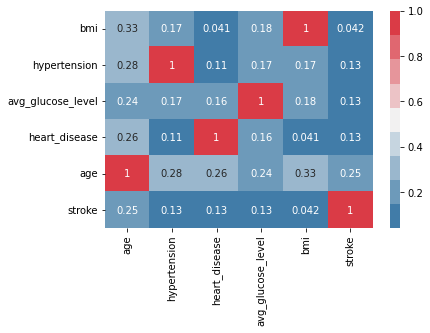

In [39]:
sns.heatmap(df.corr().sort_values(by=['stroke']), cmap = sns.diverging_palette(240, 10, n=9), annot=True);

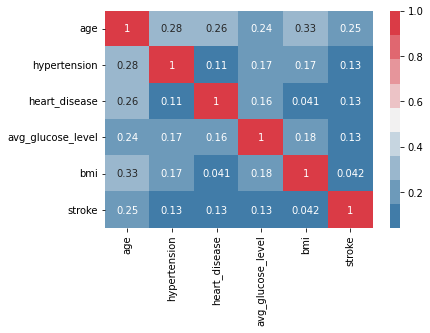

In [40]:
sns.heatmap(df.corr(), cmap = sns.diverging_palette(240, 10, n=9), annot=True);

the group that had strokes have a higher age average than those who didnt have strokes 


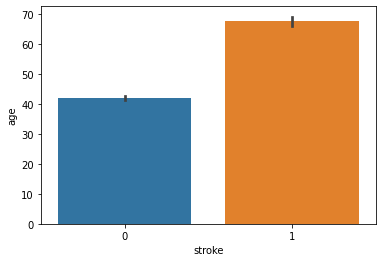

In [41]:
sns.barplot(data=df, y='age', x='stroke');
print('the group that had strokes have a higher age average than those who didnt have strokes ')

In [42]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# train, test,split and transformers

In [43]:
y = df['stroke']
X = df.drop(columns='stroke')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [44]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [45]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [46]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [47]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [48]:

number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor



ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2e5f04d50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2e61e2c50>)])

In [49]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2e5f04d50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd2e61e2c50>)])

In [50]:
X_train_pro= preprocessor.transform(X_train)
X_test_pro = preprocessor.transform(X_test)

In [51]:
print(np.isnan(X_train_pro).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_pro).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_pro.dtype)
print('All data in X_test_processed are', X_test_pro.dtype)
print('\n')
print('shape of data is', X_train_pro.shape)
print('\n')
X_train_pro

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (3832, 20)




array([[ 0.7372167 ,  3.1393509 , -0.24139427, ...,  0.        ,
         1.        ,  0.        ],
       [-0.10654894, -0.31853719, -0.24139427, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.38194696, -0.31853719, -0.24139427, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.87579225, -0.31853719, -0.24139427, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.62539105, -0.31853719, -0.24139427, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.11549465, -0.31853719, -0.24139427, ...,  0.        ,
         0.        ,  1.        ]])

# Classification

1. Knn

In [52]:
knn= KNeighborsClassifier()
knn.fit(X_train_pro,y_train)
knn_predictions = knn.predict(X_test_pro)
print(accuracy_score(y_test,knn_predictions))


0.935054773082942


In [53]:
cm = confusion_matrix(y_test.values, knn_predictions)
cm

array([[1195,    3],
       [  80,    0]])

The accuracy score is good but that's to be expected as the data was heavily biased toward no stroke. 1195 true negatives zero true positives, 3 false positives and 80 false negatives.

**Tuning Using Smote**

In [54]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_train_pro_smote, y_train_smote = smote.fit_resample(X_train_pro, y_train)

In [55]:
from collections import Counter
print ('before smote:', Counter (y_train))
print ('after smote:', Counter(y_train_smote))

before smote: Counter({0: 3663, 1: 169})
after smote: Counter({0: 3663, 1: 3663})


In [56]:
knn.fit(X_train_pro_smote,y_train_smote)
knn_smote_predictions = knn.predict(X_test_pro)
print(accuracy_score(y_test, knn_smote_predictions))

0.8309859154929577


In [57]:
cm = confusion_matrix(y_test.values, knn_smote_predictions)
cm

array([[1033,  165],
       [  51,   29]])

The smote test had more true positives and false positives.  The accuracy took a substancial dip,however in this case the false negative score went down. With strokes time is everything.  It's worse to predict a False negative because the more time a person loses before being treated the more likely they are to die of a stroke or the more likely they are to have more brain damage. Time is brain.  

3.**Decision tree classifier**

In [58]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)
dec_tree.fit(X_train_pro, y_train)
dec_tree.predict(X_test_pro)

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [60]:
train_score = dec_tree.score(X_train_pro, y_train)
test_score = dec_tree.score(X_test_pro, y_test)
print(train_score)
print(test_score)


0.9558977035490606
0.9374021909233177


In [61]:
dec_predictions=dec_tree.predict(X_test_pro)
dec_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
cm = confusion_matrix(y_test.values, dec_predictions)
cm

array([[1198,    0],
       [  80,    0]])

**Using smote for decision tree**

In [63]:
dec_tree.fit(X_train_pro_smote,y_train_smote)
smote_dec_predictions = dec_tree.predict(X_test_pro)
smote_dec_predictions

array([0, 0, 0, ..., 1, 1, 0])

In [64]:
smote_train_score = dec_tree.score(X_train_pro_smote, y_train_smote)
smote_test_score = dec_tree.score(X_test_pro, y_test)
print(smote_train_score)
print(smote_test_score)



0.7948402948402948
0.7206572769953051


In [65]:
cm = confusion_matrix(y_test.values,smote_dec_predictions)
cm

array([[855, 343],
       [ 14,  66]])

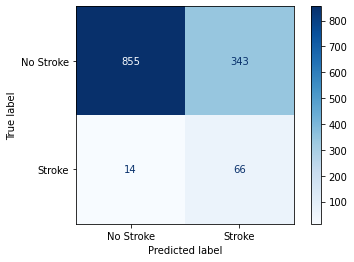

In [66]:
labels = ['No Stroke', 'Stroke']
ConfusionMatrixDisplay.from_predictions(y_test.values,smote_dec_predictions,  display_labels=labels, cmap='Blues');


Using smote for the Decision tree dipped the accuracy scores a significant amount, however there were far less false negatives and more True positive predictions

my final model is smote decision tree because it predicts the least amout of false negatives.